Loading and Visualizing Data ...
Fontconfig warning: ignoring UTF-8: not a valid region tag


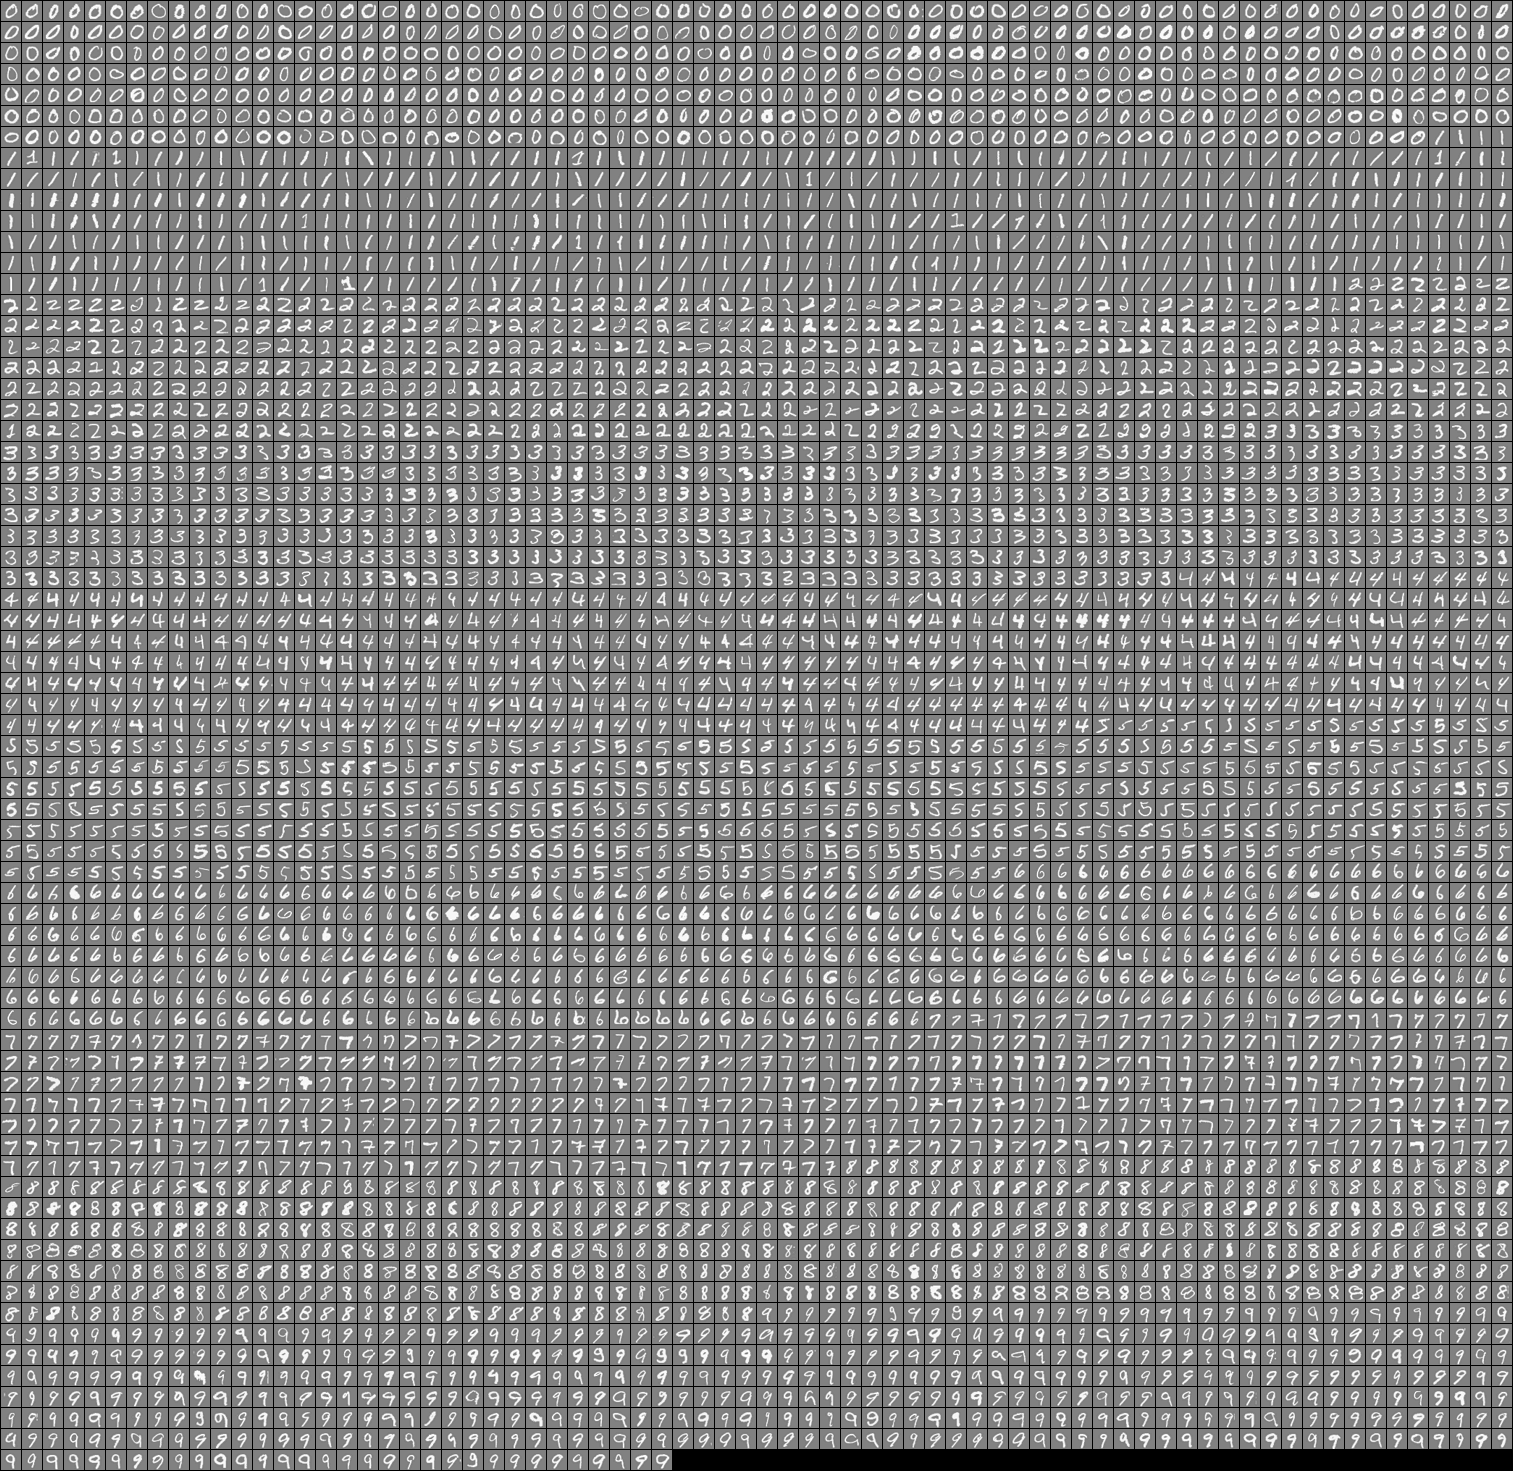

In [1]:
%% Machine Learning Online Class - Exercise 3 | Part 1: One-vs-all

%  Instructions
%  ------------
%
%  This file contains code that helps you get started on the
%  linear exercise. You will need to complete the following functions
%  in this exericse:
%
%     lrCostFunction.m (logistic regression cost function)
%     oneVsAll.m
%     predictOneVsAll.m
%     predict.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Initialization
clear ; close all; clc

%% Setup the parameters you will use for this part of the exercise
input_layer_size  = 400;  % 20x20 Input Images of Digits
num_labels = 10;          % 10 labels, from 1 to 10
                          % (note that we have mapped "0" to label 10)

%% =========== Part 1: Loading and Visualizing Data =============
%  We start the exercise by first loading and visualizing the dataset.
%  You will be working with a dataset that contains handwritten digits.
%

% Load Training Data
fprintf('Loading and Visualizing Data ...\n')

load('ex3data1.mat'); % training data stored in arrays X, y
m = size(X, 1);

% Randomly select 100 data points to display
rand_indices = randperm(m);
sel = X(rand_indices(1:100), :);

if ~exist('example_width', 'var') || isempty(example_width) 
	example_width = round(sqrt(size(X, 2)));
end

% Gray Image
colormap(gray);

% Compute rows, cols
[m n] = size(X);
example_height = (n / example_width);

% Compute number of items to display
display_rows = floor(sqrt(m));
display_cols = ceil(m / display_rows);

% Between images padding
pad = 1;

% Setup blank display
display_array = - ones(pad + display_rows * (example_height + pad), ...
                       pad + display_cols * (example_width + pad));

% Copy each example into a patch on the display array
curr_ex = 1;
for j = 1:display_rows
	for i = 1:display_cols
		if curr_ex > m, 
			break; 
		end
		% Copy the patch
		
		% Get the max value of the patch
		max_val = max(abs(X(curr_ex, :)));
		display_array(pad + (j - 1) * (example_height + pad) + (1:example_height), ...
		              pad + (i - 1) * (example_width + pad) + (1:example_width)) = ...
						reshape(X(curr_ex, :), example_height, example_width) / max_val;
		curr_ex = curr_ex + 1;
	end
	if curr_ex > m, 
		break; 
	end
end

% Display Image
h = imagesc(display_array, [-1 1]);

% Do not show axis
axis image off

drawnow;

In [8]:
%% ============ Part 2a: Vectorize Logistic Regression ============
%  In this part of the exercise, you will reuse your logistic regression
%  code from the last exercise. You task here is to make sure that your
%  regularized logistic regression implementation is vectorized. After
%  that, you will implement one-vs-all classification for the handwritten
%  digit dataset.
%

% Test case for lrCostFunction
fprintf('\nTesting lrCostFunction() with regularization');

theta_t = [-2; -1; 1; 2];
X_t = [ones(5,1) reshape(1:15,5,3)/10];
y_t = ([1;0;1;0;1] >= 0.5);
lambda_t = 3;


Testing lrCostFunction() with regularization
Testing lrCostFunction() with regularization


In [9]:
[J grad] = lrCostFunction(theta_t, X_t, y_t, lambda_t);

fprintf('\nCost: %f\n', J);
fprintf('Expected cost: 2.534819\n');
fprintf('Gradients:\n');
fprintf(' %f \n', grad);
fprintf('Expected gradients:\n');
fprintf(' 0.146561\n -0.548558\n 0.724722\n 1.398003\n');


Cost: 2.534819
Expected cost: 2.534819
Gradients:
 0.146561 
 -0.548558 
 0.724722 
 1.398003 
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003


In [10]:
fprintf('Program paused. Press enter to continue.\n');
pause;
%% ============ Part 2b: One-vs-All Training ============
fprintf('\nTraining One-vs-All Logistic Regression...\n')

lambda = 0.1;
[all_theta] = oneVsAll(X, y, num_labels, lambda);

Program paused. Press enter to continue.
Paused, enter any value to continue

Training One-vs-All Logistic Regression...
error: 'X' undefined near line 1 column 23


In [11]:
%% ================ Part 3: Predict for One-Vs-All ================

pred = predictOneVsAll(all_theta, X);

fprintf('\nTraining Set Accuracy: %f\n', mean(double(pred == y)) * 100);

error: 'all_theta' undefined near line 1 column 24
error: 'pred' undefined near line 1 column 54


In [12]:
function [J, grad] = lrCostFunction(theta, X, y, lambda)
%LRCOSTFUNCTION Compute cost and gradient for logistic regression with
%regularization
%   J = LRCOSTFUNCTION(theta, X, y, lambda) computes the cost of using
%   theta as the parameter for regularized logistic regression and the
%   gradient of the cost w.r.t. to the parameters.

% Initialize some useful values
m = length(y); % number of training examples

% You need to return the following variables correctly
J = 0;
grad = zeros(size(theta));

% ====================== YOUR CODE HERE ======================
% Instructions: Compute the cost of a particular choice of theta.
%               You should set J to the cost.
%               Compute the partial derivatives and set grad to the partial
%               derivatives of the cost w.r.t. each parameter in theta
%
% Hint: The computation of the cost function and gradients can be
%       efficiently vectorized. For example, consider the computation
%
%           sigmoid(X * theta)
%
%       Each row of the resulting matrix will contain the value of the
%       prediction for that example. You can make use of this to vectorize
%       the cost function and gradient computations.
%
% Hint: When computing the gradient of the regularized cost function,
%       there're many possible vectorized solutions, but one solution
%       looks like:
%           grad = (unregularized gradient for logistic regression)
%           temp = theta;
%           temp(1) = 0;   % because we don't add anything for j = 0
%           grad = grad + YOUR_CODE_HERE (using the temp variable)
%

% not regularized
h = sigmoid(X*theta);
J = 1/m*sum( -y.*log(h) -(1-y).*log(1-h));
grad = 1/m*sum((h-y).*X);

% regularized
% j = 1 to n notice: x is 1 index but theta is 0 index!!
J = J + lambda/(2*m)*sum(theta(2:end).^2);
grad(2:end) = grad(2:end).+(lambda/m)*theta(2:end)';

% =============================================================

grad = grad(:);

end


In [13]:
function [all_theta] = oneVsAll(X, y, num_labels, lambda)
%ONEVSALL trains multiple logistic regression classifiers and returns all
%the classifiers in a matrix all_theta, where the i-th row of all_theta
%corresponds to the classifier for label i
%   [all_theta] = ONEVSALL(X, y, num_labels, lambda) trains num_labels
%   logistic regression classifiers and returns each of these classifiers
%   in a matrix all_theta, where the i-th row of all_theta corresponds
%   to the classifier for label i

% Some useful variables
m = size(X, 1);
n = size(X, 2);

% You need to return the following variables correctly
all_theta = zeros(num_labels, n + 1);

% Add ones to the X data matrix
X = [ones(m, 1) X];

% ====================== YOUR CODE HERE ======================
% Instructions: You should complete the following code to train num_labels
%               logistic regression classifiers with regularization
%               parameter lambda.
%
% Hint: theta(:) will return a column vector.
%
% Hint: You can use y == c to obtain a vector of 1's and 0's that tell you
%       whether the ground truth is true/false for this class.
%
% Note: For this assignment, we recommend using fmincg to optimize the cost
%       function. It is okay to use a for-loop (for c = 1:num_labels) to
%       loop over the different classes.
%
%       fmincg works similarly to fminunc, but is more efficient when we
%       are dealing with large number of parameters.
%
% Example Code for fmincg:
%
%     % Set Initial theta
%     initial_theta = zeros(n + 1, 1);
%
%     % Set options for fminunc
%     options = optimset('GradObj', 'on', 'MaxIter', 50);
%
%     % Run fmincg to obtain the optimal theta
%     % This function will return theta and the cost
%     [theta] = ...
%         fmincg (@(t)(lrCostFunction(t, X, (y == c), lambda)), ...
%                 initial_theta, options);
%

% [J grad] = lrCostFunction(all_theta, X, y, lambda);

for K = 1:num_labels
    % Get initial theta value
    initial_theta = zeros(n + 1, 1);
    % Set Option
    options = optimset('GradObj', 'on', 'MaxIter', 50);
    % Get Optimized Theta Gradient Decent by fmincg (Function Bandle)
    all_theta(K,:) = fmincg (@(t)(lrCostFunction(t, X, (y == K), lambda)), initial_theta, options)';
end
% =========================================================================


end


In [14]:
function p = predictOneVsAll(all_theta, X)
%PREDICT Predict the label for a trained one-vs-all classifier. The labels
%are in the range 1..K, where K = size(all_theta, 1).
%  p = PREDICTONEVSALL(all_theta, X) will return a vector of predictions
%  for each example in the matrix X. Note that X contains the examples in
%  rows. all_theta is a matrix where the i-th row is a trained logistic
%  regression theta vector for the i-th class. You should set p to a vector
%  of values from 1..K (e.g., p = [1; 3; 1; 2] predicts classes 1, 3, 1, 2
%  for 4 examples)

m = size(X, 1);
num_labels = size(all_theta, 1);

% You need to return the following variables correctly
p = zeros(size(X, 1), 1);

% Add ones to the X data matrix
X = [ones(m, 1) X];

% ====================== YOUR CODE HERE ======================
% Instructions: Complete the following code to make predictions using
%               your learned logistic regression parameters (one-vs-all).
%               You should set p to a vector of predictions (from 1 to
%               num_labels).
%
% Hint: This code can be done all vectorized using the max function.
%       In particular, the max function can also return the index of the
%       max element, for more information see 'help max'. If your examples
%       are in rows, then, you can use max(A, [], 2) to obtain the max
%       for each row.
%

% Hypothesis Representation h = g(theta'X)
predict = sigmoid(X*all_theta');
% I returns max predecit value index.
[M,I]= max(predict,[],2);
p = I;

% =========================================================================


end


Loading and Visualizing Data ...
Fontconfig warning: ignoring UTF-8: not a valid region tag
Program paused. Press enter to continue.
Paused, enter any value to continue


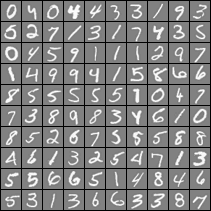

In [1]:
%% Machine Learning Online Class - Exercise 3 | Part 2: Neural Networks

%  Instructions
%  ------------
% 
%  This file contains code that helps you get started on the
%  linear exercise. You will need to complete the following functions 
%  in this exericse:
%
%     lrCostFunction.m (logistic regression cost function)
%     oneVsAll.m
%     predictOneVsAll.m
%     predict.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Initialization
clear ; close all; clc

%% Setup the parameters you will use for this exercise
input_layer_size  = 400;  % 20x20 Input Images of Digits
hidden_layer_size = 25;   % 25 hidden units
num_labels = 10;          % 10 labels, from 1 to 10   
                          % (note that we have mapped "0" to label 10)

%% =========== Part 1: Loading and Visualizing Data =============
%  We start the exercise by first loading and visualizing the dataset. 
%  You will be working with a dataset that contains handwritten digits.
%

% Load Training Data
fprintf('Loading and Visualizing Data ...\n')

load('ex3data1.mat');
m = size(X, 1);

% Randomly select 100 data points to display
sel = randperm(size(X, 1));
sel = sel(1:100);

displayData(X(sel, :));

fprintf('Program paused. Press enter to continue.\n');
pause;


In [2]:
%% ================ Part 2: Loading Pameters ================
% In this part of the exercise, we load some pre-initialized 
% neural network parameters.

fprintf('\nLoading Saved Neural Network Parameters ...\n')

% Load the weights into variables Theta1 and Theta2
load('ex3weights.mat');


Loading Saved Neural Network Parameters ...


In [ ]:
%% ================= Part 3: Implement Predict =================
%  After training the neural network, we would like to use it to predict
%  the labels. You will now implement the "predict" function to use the
%  neural network to predict the labels of the training set. This lets
%  you compute the training set accuracy.

pred = predict(Theta1, Theta2, X);

fprintf('\nTraining Set Accuracy: %f\n', mean(double(pred == y)) * 100);

fprintf('Program paused. Press enter to continue.\n');
pause;

%  To give you an idea of the network's output, you can also run
%  through the examples one at the a time to see what it is predicting.

%  Randomly permute examples
rp = randperm(m);

for i = 1:m
    % Display 
    fprintf('\nDisplaying Example Image\n');
    displayData(X(rp(i), :));

    pred = predict(Theta1, Theta2, X(rp(i),:));
    fprintf('\nNeural Network Prediction: %d (digit %d)\n', pred, mod(pred, 10));
    
    % Pause with quit option
    s = input('Paused - press enter to continue, q to exit:','s');
    if s == 'q'
      break
    end
end

In [3]:
function p = predict(Theta1, Theta2, X)
%PREDICT Predict the label of an input given a trained neural network
%   p = PREDICT(Theta1, Theta2, X) outputs the predicted label of X given the
%   trained weights of a neural network (Theta1, Theta2)

% Useful values
m = size(X, 1);
num_labels = size(Theta2, 1);

% You need to return the following variables correctly
p = zeros(size(X, 1), 1);

% ====================== YOUR CODE HERE ======================
% Instructions: Complete the following code to make predictions using
%               your learned neural network. You should set p to a
%               vector containing labels between 1 to num_labels.
%
% Hint: The max function might come in useful. In particular, the max
%       function can also return the index of the max element, for more
%       information see 'help max'. If your examples are in rows, then, you
%       can use max(A, [], 2) to obtain the max for each row.
%

% 2nd layer
a_1 = [ones(m,1) X];
z_2 = a_1*Theta1';
a_2 = [ones(size(z_2, 1), 1) sigmoid(z_2)];
z_3 = a_2*Theta2';
a_3 = sigmoid(z_3);

[M, I] = max(a_3, [], 2);
p = I;

% =========================================================================


end


A =

   1   2   3
   4   5   6

